In [ ]:
# default_exp detr

# DETR
> An API for using the detr model by Facebook AI.

In [ ]:
#export
#hide
from nbdev.showdoc import *
from transformers import DetrFeatureExtractor, DetrForObjectDetection
from fastai.vision.all import *

In [ ]:
#export
class DETR : 
    """Class for setting up a detection transformer for object detection.

    Attributes :
        img_path : Path to the image
    """

    def __init__ (self, img_path) :
        self.img_path = img_path
        self.test_img = PILImage.create(self.img_path)
    
    def get_detr (self) :
        """Method for getting the detr model.
        """
        feature_extractor = DetrFeatureExtractor.from_pretrained('facebook/detr-resnet-50')
        model = DetrForObjectDetection.from_pretrained('facebook/detr-resnet-50')
        return feature_extractor, model
    
    def infer (self, feature_extractor, model): 
        """Mthod for getting the bounding boxes.

        Attributes : 
            feature_extractor : The feature extractor, which is returned by the `get_dter` method
            model : The detr model, returned by the `get_detr` method
        """
        input = feature_extractor(self.test_img, return_tensors = 'pt')
        output = model(**input)
        return output
    
    def show_image (self) : 
        """Method to display the image
        """
        self.test_img.show()

In [ ]:
show_doc(DETR.get_detr)

<h4 id="DETR.get_detr" class="doc_header"><code>DETR.get_detr</code><a href="__main__.py#L13" class="source_link" style="float:right">[source]</a></h4>

> <code>DETR.get_detr</code>()

Method for getting the detr model.
        

In [ ]:
show_doc(DETR.infer)

<h4 id="DETR.infer" class="doc_header"><code>DETR.infer</code><a href="__main__.py#L20" class="source_link" style="float:right">[source]</a></h4>

> <code>DETR.infer</code>(**`feature_extractor`**, **`model`**)

Mthod for getting the bounding boxes.

Attributes : 
    feature_extractor : The feature extractor, which is returned by the `get_dter` method
    model : The detr model, returned by the `get_detr` method

In [ ]:
show_doc(DETR.show_image)

<h4 id="DETR.show_image" class="doc_header"><code>DETR.show_image</code><a href="__main__.py#L31" class="source_link" style="float:right">[source]</a></h4>

> <code>DETR.show_image</code>()

Method to display the image
        

Let's see an example of how to use this class :

In [ ]:
path = untar_data(URLs.PASCAL_2007)

In [ ]:
detr_ob = DETR(path/'test'/'001407.jpg')

In [ ]:
feature_extractr, model = detr_ob.get_detr()

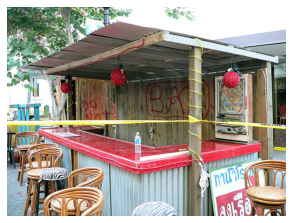

In [ ]:
detr_ob.show_image()

In [ ]:
output = detr_ob.infer(feature_extractr, model)
output

/home/krsna/.local/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/home/krsna/.local/lib/python3.8/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


DetrObjectDetectionOutput(loss=None, loss_dict=None, logits=tensor([[[-14.8240,  -0.7422,  -2.0375,  ...,  -8.6955,  -9.2951,   6.3519],
         [-12.3239,   0.7649,  -3.4738,  ...,  -5.3037,  -1.2467,   6.9548],
         [-14.7922,  -1.2780,  -2.3390,  ...,  -8.3583, -11.8777,   6.7950],
         ...,
         [-16.5524,  -1.1590, -10.7845,  ...,  -6.5104,  -5.0777,   9.5556],
         [-16.6411,  -0.4054,  -6.7103,  ...,  -8.9679,  -5.4048,   8.1550],
         [-16.5358,   0.2891,  -4.5525,  ...,  -4.0103,  -2.9580,   8.2184]]],
       grad_fn=<AddBackward0>), pred_boxes=tensor([[[0.0312, 0.6896, 0.0470, 0.1512],
         [0.4686, 0.6384, 0.0217, 0.0654],
         [0.1392, 0.8852, 0.1581, 0.2278],
         [0.5187, 0.6178, 0.0255, 0.0928],
         [0.1942, 0.6072, 0.1401, 0.0415],
         [0.2812, 0.8212, 0.1268, 0.1037],
         [0.2804, 0.8271, 0.1278, 0.0968],
         [0.1645, 0.7937, 0.1100, 0.0560],
         [0.1438, 0.5111, 0.0223, 0.0478],
         [0.1409, 0.5077, 0.0240

In [ ]:
output.last_hidden_state.shape

torch.Size([1, 100, 256])

In [ ]:
print(path)

/home/krsna/.fastai/data/pascal_2007
